In [1]:
!pip install --upgrade pip
%pip install pyrealm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 17.5 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 91.9 MB/s eta 0:00:00
  Attempting uninstall: tabulate
    Found existing installation: tabulate 0.9.0
    Uninstalling tabulate-0.9.0:
      Successfully uninstalled tabulate-0.9.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.22.0 requires tabulate>=0.9, but you have tabulate 0.8.10 which is incompatible.
cupy-cuda12x 12.2.0 requires numpy<1.27,>=1.20, but you have numpy 2.1.2 which is incompatible.
gensim 4.3.3 requires nump

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install --upgrade 'numpy<2.0' 'pandas==2.0.0'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pyrealm.splash.splash import SplashModel
from pyrealm.core.calendar import Calendar
import os
# remember to change the path of your file
ds = pd.read_csv('/content/drive/MyDrive/pyrealm_demo/FLX_AT-Neu_FLUXDATAKIT_FULLSET_HH_2002_2012_2-3.csv')

# Extract the key half hourly timestep variables as numpy arrays
site_temp = ds.loc[:, 'TA_F_MDS'] # daily temperature, unit degree (°C)
site_temp[site_temp < -25] = np.nan
site_swin = ds.loc[:, 'SW_IN_F_MDS']  # shortwave radiation, unit W/m2
site_ppfd = site_swin * (60*30) * 2.04 /1000000  # convert to KJ/m2/30 min then umol/m2/30 min
site_vpd = ds.loc[:, 'VPD_F_MDS'] * 100  # vpd, unit: hPa converted to Pa
site_co2 = ds.loc[:, 'CO2_F_MDS']  # CO2, unit ppm
site_patm = ds.loc[:, 'PA_F'] * 1000  # site pressure, unit kPa converted to Pa
site_prep = ds.loc[:,'P_F']
site_fapar = ds.loc[:, 'FPAR']  # fapar

datetime_subdaily=np.arange(datetime(2002, 1, 1, 0, 00),
              datetime(2013,1,1,0,0),
              np.timedelta64(30, "m"))


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 102.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 152.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.2
    Uninstalling numpy-2.1.2:
      Successfully uninstalled numpy-2.1.2
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.22.0 requires tabulate>=0.9, but you have tabulate 0.8.10 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.0.0 which is incompatible.
mizani 0.11.4 requires pandas>=2.1.0, but you have pandas 2.0.0 which is incompatible.
plotnine 0.13.6 requires pandas<3.0.0,>=2.1.0, but you have pandas 2.0.0 which is incompatibl

pyrealm/<ipython-input-3-fcd6a70ae915>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


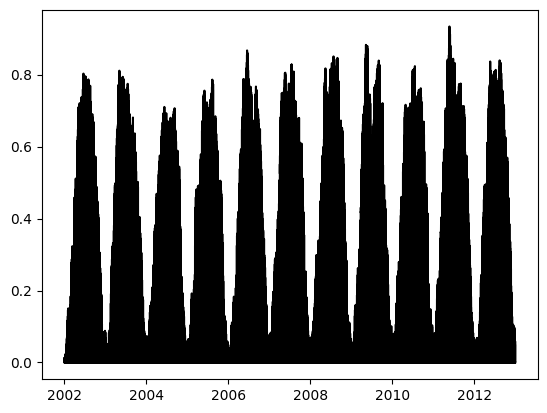

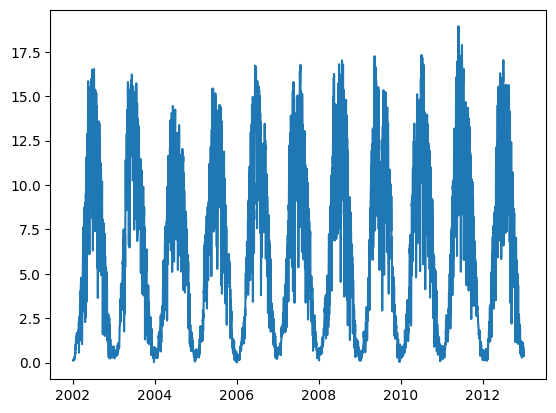

In [5]:
!pip install --upgrade numpy
import pyrealm.pmodel

# Calculate the photosynthetic environment
subdaily_env = pyrealm.pmodel.PModelEnvironment(
    tc=site_temp.values,
    vpd=site_vpd.values,
    co2=site_co2.values,
    patm=site_patm.values,
)

# Create the fast slow scaler
fsscaler = pyrealm.pmodel.SubdailyScaler(datetime_subdaily)

# Set the acclimation window as the values within a one hour window centred on noon
fsscaler.set_window(
    window_center=np.timedelta64(12, "h"),
    half_width=np.timedelta64(30, "m"),
)

# Fit the P Model with fast and slow responses
pmodel_subdaily = pyrealm.pmodel.SubdailyPModel(
    env=subdaily_env,
    fs_scaler=fsscaler,
    allow_holdover=True,
    ppfd=site_ppfd.values,
    fapar=site_fapar.values,
)
plt.figure(0)
plt.plot(datetime_subdaily, pmodel_subdaily.gpp, color="black")

# sum to daily gpp
gpp_daily = np.add.reduceat(pmodel_subdaily.gpp,np.arange(0, len(pmodel_subdaily.gpp), 48))
days=np.arange(datetime(2002, 1, 1, 0, 00),
        datetime(2013,1,1,0,0),
        np.timedelta64(1, "D"))
plt.figure(1)
plt.plot(days, gpp_daily)

In [9]:
!pip install --upgrade 'numpy<2.0' 'pandas==2.0.0'


site_info = pd.read_csv('/content/drive/MyDrive/pyrealm_demo/fdk_site_info.csv')
## choose site
ds = pd.read_csv('/content/drive/MyDrive/pyrealm_demo/AT-Neu.csv')
# check site name
print(str(ds.sitename.unique()[0]))
## read site inputs
site_temp = ds.loc[:, 'TA_F_MDS'] # daily temperature, unit degree (°C)
site_temp[site_temp < -25] = np.nan
site_swin = ds.loc[:, 'SW_IN_F_MDS']  # shortwave radiation, unit W/m2
site_ppfd = site_swin * (60*60*24) * 2.04 /1000000  # convert to KJ/m2/d then umol/m2/d
site_vpd = ds.loc[:, 'VPD_F_MDS'] * 100  # vpd, unit: hPa converted to Pa
site_co2 = ds.loc[:, 'CO2_F_MDS']  # CO2, unit ppm
site_patm = ds.loc[:, 'PA_F'] * 1000  # site pressure, unit kPa converted to Pa
site_prep = ds.loc[:,'P_F']
site_cld = ds.loc[:, 'CLD']  # cloud cover
site_sunfrac = (100-site_cld)/100 # sun fraction, 0-1
site_fapar = ds.loc[:, 'FPAR']  # fapar

site_lat = site_info.loc[site_info['sitename'] == str(ds.sitename.unique()[0]),'lat']
site_elev = site_info.loc[site_info['sitename'] == str(ds.sitename.unique()[0]),'elv']

splash = SplashModel(
    lat=np.broadcast_to(site_lat, site_sunfrac.shape),
    elv=np.broadcast_to(site_elev, site_sunfrac.shape),
    dates=Calendar(days),
    sf=site_sunfrac.values,
    tc=site_temp.values,
    pn=site_prep.values,
)
init_soil_moisture = splash.estimate_initial_soil_moisture(verbose=True)
# output: aet (actual evapotranspiration), wn (soil volume moisture), ro (run off)
aet_out, wn_out, ro_out = splash.calculate_soil_moisture(init_soil_moisture)
pet_out = splash.evap.pet_d # potential evapotranspiration
alpha = np.mean(aet_out)/np.mean(pet_out)
aridity_index = np.mean(pet_out)/np.mean(site_prep)
# calculate relative soil moisture as soil moisture divided by the volume of bucket (150 L)
wn_out_rela = wn_out/150

AT-Neu
Iteration: 1; maximum difference: 150.0
Iteration: 2; maximum difference: 0.0


pyrealm/<ipython-input-9-4c53a9a54405>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


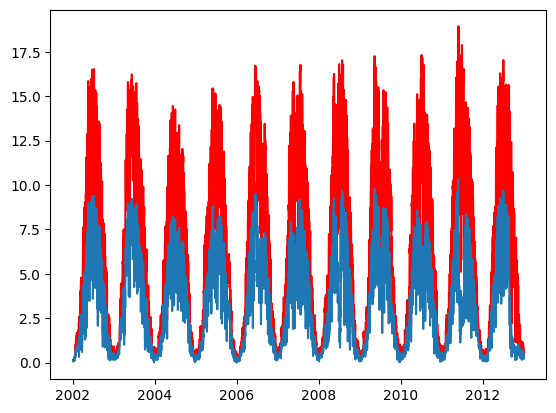

In [12]:
gpp_daily_somois = gpp_daily * pyrealm.pmodel.functions.calc_soilmstress_mengoli(wn_out_rela,aridity_index)
plt.plot(days, gpp_daily, color='red')
plt.plot(days, gpp_daily_somois)